In [1]:
import numpy as np
from cdo import *
cdo = Cdo()
from os import getenv

HOME = getenv('HOME')

bbox = '-20,20,-20,20'
bbox_ocgis = [-20,-22,20,20]

# global dataset CMIP5
resources = HOME+'/.conda/envs/birdhouse/var/lib/cache/pywps/esgf1.dkrz.de/thredds/fileServer/cmip5/cmip5/output1/MPI-M/MPI-ESM-LR/historical/day/atmos/day/r1i1p1/v20111006/psl/psl_day_MPI-ESM-LR_historical_r1i1p1_20000101-20051231.nc'

In [2]:
# get the North Atlanic region form global dataset with cdo
nc  = cdo.sellonlatbox( bbox, input=resources, output=HOME+'/data/tests/subset.nc' )

In [3]:
# read in the file
from netCDF4 import Dataset, num2date
from flyingpigeon.utils import get_variable

var = get_variable(nc)
#print 'variable name: %s' % var
ds = Dataset(nc)
psl = ds.variables[var]
lat = ds.variables['lat']
lon = ds.variables['lon']

In [4]:
print lon[:]

[-18.75  -16.875 -15.    -13.125 -11.25   -9.375  -7.5    -5.625  -3.75
  -1.875   0.      1.875   3.75    5.625   7.5     9.375  11.25   13.125
  15.     16.875  18.75 ]


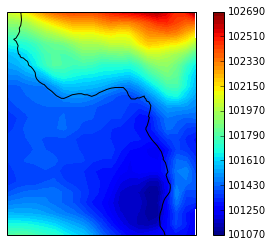

In [5]:
from matplotlib import pyplot as plt
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from numpy import meshgrid
# to show the plots inline
%matplotlib inline

lons, lats = meshgrid(lon, lat)

# plot first time stepp:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.coastlines()
cs = plt.contourf(lons, lats, psl[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest')
plt.colorbar()


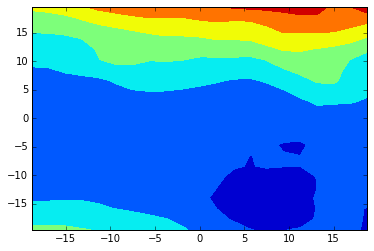

In [6]:
cs = plt.contourf(lons, lats, psl[0,:,:])

In [7]:
# same stepps with ocgis
from flyingpigeon.ocgis_module import call 

#from ocgis import RequestDataset ,OcgOperations
spatial_wrapping = 'wrap' # unwrap # None
nc = call(resources, geom=bbox_ocgis, spatial_wrapping=spatial_wrapping, dir_output=HOME+'/data/tests')
print nc

/home/nils/data/tests/c1dcee6a-3c5c-11e6-8afa-2d5851098821.nc


In [8]:
#read in the data 
var = get_variable(nc)
#print 'variable name: %s' % var
ds = Dataset(nc)
psl = ds.variables[var]
lat = ds.variables['lat']
lon = ds.variables['lon']

In [9]:
print lon[:]

[-18.75  -16.875 -15.    -13.125 -11.25   -9.375  -7.5    -5.625  -3.75
  -1.875   0.      1.875   3.75    5.625   7.5     9.375  11.25   13.125
  15.     16.875  18.75 ]


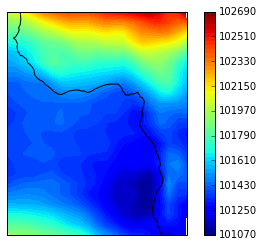

In [10]:
lons, lats = meshgrid(lon, lat)

# plot first time stepp:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.coastlines()
cs = plt.contourf(lons, lats, psl[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest')
plt.colorbar()

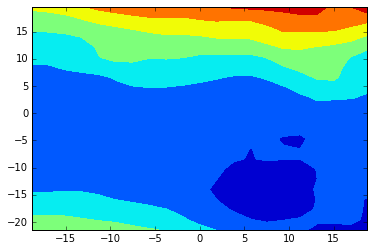

In [11]:
# cartopy puts it together how I would like to have it ;-) 
# simple plot shows the 'problem'
cs = plt.contourf(lons, lats, psl[0,:,:])

In [12]:
lat[:]

array([-21.45047569, -19.58521843, -17.71996117, -15.8547039 ,
       -13.98944569, -12.12418747, -10.2589283 ,  -8.39366913,
        -6.52840948,  -4.66314983,  -2.79788971,  -0.93263   ,
         0.93262988,   2.79788995,   4.66314983,   6.52840948,
         8.39366913,  10.2589283 ,  12.12418747,  13.98944569,
        15.8547039 ,  17.71996117,  19.58521843])

In [13]:
from flyingpigeon import subset as sb

In [14]:
africa = sb.clipping(resource=resources, historical_concatination=True, 
            prefix='test_africa', spatial_wrapping='wrap', polygons='Africa', dir_output=HOME+'/data/tests/')

In [15]:
var = get_variable(africa[0])
#print 'variable name: %s' % var
ds = Dataset(africa[0])
psl = ds.variables[var]
lat = ds.variables['lat']
lon = ds.variables['lon']

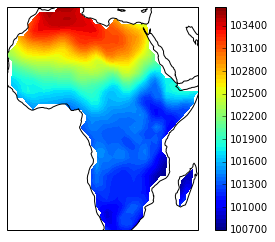

In [16]:
lons, lats = meshgrid(lon, lat)

# plot first time stepp:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.coastlines()
cs = plt.contourf(lons, lats, psl[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest')
plt.colorbar()

In [17]:
lon[:]

array([-16.875, -15.   , -13.125, -11.25 ,  -9.375,  -7.5  ,  -5.625,
        -3.75 ,  -1.875,   0.   ,   1.875,   3.75 ,   5.625,   7.5  ,
         9.375,  11.25 ,  13.125,  15.   ,  16.875,  18.75 ,  20.625,
        22.5  ,  24.375,  26.25 ,  28.125,  30.   ,  31.875,  33.75 ,
        35.625,  37.5  ,  39.375,  41.25 ,  43.125,  45.   ,  46.875,
        48.75 ,  50.625])

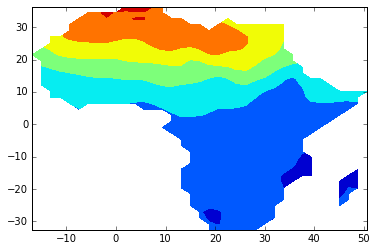

In [18]:
cs = plt.contourf(lons, lats, psl[0,:,:])

In [19]:
from flyingpigeon import utils
reload(sb)

res_rot = HOME+'/.conda/envs/birdhouse/var/lib/cache/pywps/esgf1.dkrz.de/thredds/fileServer/cordex/cordex/output/EUR-44/CLMcom/MPI-M-MPI-ESM-LR/historical/r1i1p1/CLMcom-CCLM4-8-17/v1/mon/tas/v20140520/tas_EUR-44_MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-CCLM4-8-17_v1_mon_200101-200512.nc' 

europe = sb.clipping(resource=res_rot, historical_concatination=True, memory_limit=1, 
            prefix='test_europe', spatial_wrapping='wrap', polygons='Europe', dir_output=HOME+'/data/tests/')
europe

ocgis module call compute with chunks
getting fill file...
geometry subset is present. calculating slice offsets...
getting tile schema shape inputs...
getting tile schema...
output file is: /home/nils/data/tests/test_europe.nc
tile count: 4
tiles progress: [----------------------------------------]########################################]
complete.


['/home/nils/data/tests/test_europe.nc']

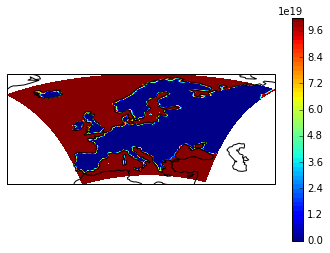

In [73]:
lats, lons = utils.unroate_pole(europe[0], write_to_file=False)
var = get_variable(europe[0])

ds = Dataset(europe[0])
val = np.squeeze(ds.variables[var])

# val_m = np.ma.array(val[:], mask=val[:] > 1000)

# plot first time stepp:
ax = plt.axes(projection=ccrs.PlateCarree()) #Robinson(central_longitude=0)
ax.coastlines()
cs = plt.contourf(lons, lats, val[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest',
                  )
plt.colorbar()
ds.close()

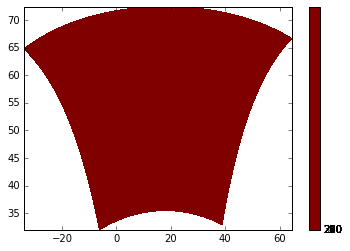

In [74]:
cs = plt.contourf(lons, lats, val[0,:,:], 60, vmin=200, vmax=300)
ticks = np.linspace(200,300, num=11, endpoint=True)
cb =plt.colorbar(ticks=ticks, )
cb.vmin=200
cb.vmax=300

In [68]:
ticks

array([ 200.,  210.,  220.,  230.,  240.,  250.,  260.,  270.,  280.,
        290.,  300.])

In [ ]:
cb.vmax